<a href="https://colab.research.google.com/github/kingcastle1/Topic_Anlysis/blob/main/ALAE_data_%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade gspread oauth2client
!pip install pyLDAvis scikit-learn pandas



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.7 MB/s eta 0:00:00


In [ ]:
# !pip install --upgrade gspread oauth2client
# !pip install pyLDAvis scikit-learn pandas==2.1.4

import gspread
from google.auth import default
from google.colab import auth
import pandas as pd

# Check if 'pandas' is a module, not a variable
# print(type(pd))  # Should print <class 'module'>

# 사용자 인증 수행
auth.authenticate_user()

# 기본 인증 자격 증명 가져오기
creds, _ = default()

gc = gspread.authorize(creds)

# 구글 시트 열기
sheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1PwajOPzqFS4-N7ew7nPwLe1dQ7JtTMqsrgMbFFTsXSU/edit?gid=32713224#gid=32713224')
worksheet = sheet.get_worksheet(0)

# 데이터프레임으로 변환
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# 데이터 확인
df.head()


,저자명,주저자 소속기관,abstract,학술지명,발행기관명,주제분야,발행연도,제목,초록,저자키워드,...,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic,Topic Title,적합,Alter.,Alter_#
0,박혜경,송원대학교,This study aims to analyze the job change expe...,HRD연구,한국인력개발학회,평생교육,2021,인공지능 도입에 따른 직무 변화와 적응적 전문성 인식에 대한 고찰: 기자의 경험을 ...,최근 인공지능 기술의 발전과 도입이 직업세계에 미치는 영향에 대한 다양한 논의가 이...,"인공지능, 현상학적 질적 연구, 직무 변화, 적응적 전문성",...,0.017717,0.017267,0.01819,0.017334,0.017506,1,Trends in Lifelong Education and Adult Learning,1,,
1,한경호;조용래,한림대학교,Objectives: Acquired cognitive-communication d...,Communication Sciences and Disorders,한국언어청각임상학회,교육학,2020,인지-의사소통장애 간편검사(BCCD)의 신뢰도 및 타당도 연구,배경 및 목적: 고령화에 따라 후천적 인지-의사소통장애가 급증할 것으로 보인다. 이...,"후천적 인지-의사소통장애, 신뢰도, 타당도, 인지-의사소통장애 평가도구",...,0.031534,0.030732,0.032375,0.030851,0.031158,1,Trends in Lifelong Education and Adult Learning,1,,
2,이지은,한양사이버대학교,The purpose of this study was to examine the r...,Andragogy Today: Interdisciplinary Journal of ...,한국성인교육학회,분야교육,2023,교육서비스산업 종사자가 지각하는 조직지원인식과 조직시민행동 간의 관계에서 직무열의의...,"본 연구는 교육서비스산업 종사자인 학원강사가 지각하는 조직지원인식, 조직시민행동, ...","조직지원인식, 조직시민행동, 직무열의, 매개효과, 학원강사",...,0.01232,0.012007,0.012648,0.012053,0.012173,1,Trends in Lifelong Education and Adult Learning,1,,
3,이희은;리상섭,코드스테이츠 커리어팀,The Masterity Scale is a self-report scale wit...,Andragogy Today: Interdisciplinary Journal of ...,한국성인교육학회,분야교육,2023,Rasch 평정척도모형을 활용한 장인성 측정 도구의 단축형 개발 및 타당화 연구,"장인성 측정 도구는 현대 장인의 특성을 4가지의 측면으로 구분하여 개발되었으며, 장...","장인성, 단축형 척도, Rasch 평정척도모형",...,0.031538,0.030736,0.032379,0.030856,0.031163,1,Trends in Lifelong Education and Adult Learning,,,
4,김은경;조대연,고려대학교,The purpose of this research was to identify a...,Andragogy Today: Interdisciplinary Journal of ...,한국성인교육학회,분야교육,2023,"대학 행정관리자의 온정적 합리주의 리더십과 행정직원의 학습문화 수준, 자기효능감, ...",본 연구의 목적은 대학 행정관리자의 온정적 합리주의 리더십과 행정직원의 학습문화 수...,"대학행정, 온정적 합리주의 리더십, 조직효과성, 학습문화 수준, 자기효능감, 팔로워십",...,0.014534,0.014164,0.014922,0.014219,0.014361,1,Trends in Lifelong Education and Adult Learning,1,,


In [ ]:
# df['영어키워드'].dropna(inplace=True)
df.영어키워드

,영어키워드
0,"artificial intelligence, qualitative research,..."
1,"Acquired-cognitive communication disorders, Co..."
2,"perceived organizational support, organization..."
3,"Masterity, short-form, Rasch rating scale mode"
4,"university administration, compassionate ratio..."
...,...
1546,"Social Competence, Occupational Characteristic..."
1547,"Midlife Adult Learners, Tourism Experience, Ge..."
1548,"Reading Education, Adult Reading, Adult Readin..."
1549,


In [ ]:
# 데이터프레임의 열 이름 출력
print(df.columns)


Index(['유형', '저자명', '주저자 소속기관', '논문명', '학술지명', '저자키워드', '영어키워드', '영어초록',
       '발행기관명', '발행연도', '주제분야', '반출일'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 저자키워드 열의 데이터 타입 확인
print(df['저자키워드'].dtype)

# 저자키워드 열의 데이터를 출력 확인
print(df['저자키워드'].head(10))


object
0          성인학습자, 현역학생, 대학생활적응, 버킷리스트, 근거이론
1    스마트폰 과다사용, 인지적 탈융합, 심리적 유연성 부족, 수용전념치료
2         4차 산업혁명, 에듀테크, 사례연구, 고등교육, 대학 경쟁력
3        성장마인드셋, 메타인지, 그릿, 자기주도 학습능력, 성인학습자
4                       퇴직, 가교일자리, 질적 연구 방법
5     성인교육, 요구분석, 연구동향, 토픽 모델링, 키워드 네트워크 분석
6        과학기술인, 형식학습, 무형식학습, 학습접근, 잠재프로파일분석
7                          학습민첩성, 측정도구, 타당화
8          인공지능, 현상학적 질적 연구, 직무 변화, 적응적 전문성
9        평생교육, 성인 학습자, 사회복지사, 직업정체성, 단기종단연구
Name: 저자키워드, dtype: object


In [ ]:
# 문자열이 아닌 데이터를 문자열로 변환
df['저자키워드'] = df['저자키워드'].astype(str)

# 변환된 데이터를 다시 확인
print(df['저자키워드'].head(10))


0          성인학습자, 현역학생, 대학생활적응, 버킷리스트, 근거이론
1    스마트폰 과다사용, 인지적 탈융합, 심리적 유연성 부족, 수용전념치료
2         4차 산업혁명, 에듀테크, 사례연구, 고등교육, 대학 경쟁력
3        성장마인드셋, 메타인지, 그릿, 자기주도 학습능력, 성인학습자
4                       퇴직, 가교일자리, 질적 연구 방법
5     성인교육, 요구분석, 연구동향, 토픽 모델링, 키워드 네트워크 분석
6        과학기술인, 형식학습, 무형식학습, 학습접근, 잠재프로파일분석
7                          학습민첩성, 측정도구, 타당화
8          인공지능, 현상학적 질적 연구, 직무 변화, 적응적 전문성
9        평생교육, 성인 학습자, 사회복지사, 직업정체성, 단기종단연구
Name: 저자키워드, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import numpy as np
import matplotlib.pyplot as plt
import gensim
from gensim.matutils import Sparse2Corpus
from gensim.corpora import Dictionary

# '저자키워드' 열 사용
data_text = df['저자키워드']

# 텍스트 전처리: 소문자 변환 및 불필요한 공백 제거, 빈 문자열 제거
data_text = data_text.apply(lambda x: [keyword.strip().lower() for keyword in x.split(',') if keyword.strip()])

# CountVectorizer를 사용하여 문서-단어 행렬 생성
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
X = vectorizer.fit_transform(data_text)

# LDA 모델 학습
num_topics = 6  # 원하는 토픽의 수로 조정
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# 단어 집합
feature_names = vectorizer.get_feature_names_out()

# 각 토픽에 기여하는 단어 확인
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print_top_words(lda_model, feature_names, 10)

# Scikit-learn LDA 모델을 Gensim 형식으로 변환
corpus = Sparse2Corpus(X, documents_columns=False)
id2word = Dictionary.from_corpus(corpus, id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))

# Gensim LDA 모델 생성
gensim_lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    num_topics=num_topics,
    id2word=id2word,
    passes=10,
    alpha='auto',
    eta='auto'
)

# pyLDAvis를 사용한 시각화
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(gensim_lda_model, corpus, id2word)
pyLDAvis.display(panel)

# HTML 생성 및 폰트 크기 조정
html = pyLDAvis.prepared_data_to_html(panel)
html = html.replace("<style>", """
<style>
body { font-size: 16px; }
text { font-size: 16px; }
.axis text { font-size: 16px; }
.topic, .terms { font-size: 16px; }
.topic-title, .term { font-size: 16px; }
</style>
""")


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Topic #0:
성인 학습자 우울 연구 동향 안드라고지 대학생 청소년 비만 전환학습 학습몰입 질적연구
Topic #1:
성인학습자 평생교육 발달장애인 대학생 성인 자아존중감 생애주기 성인학습 불안 디지털 리터러시
Topic #2:
평생교육 성인 성인학습자 매개효과 발달장애인 연구동향 생애주기 타당화 교육 자기주도학습
Topic #3:
성인학습자 성인 평생교육 대학생 발달장애 지적장애 요구분석 고등교육 발달장애인 성인 학습자
Topic #4:
성인학습자 평생교육 평생학습 자기효능감 참여동기 연구동향 사례연구 성인교육 학습성과 문화예술교육
Topic #5:
연구동향 평생교육 장애인 평생교육 성인교육 성인애착 성인 대학생 키워드 네트워크 분석 연구 동향 메타분석



**시각화**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import numpy as np
import gensim
from gensim.matutils import Sparse2Corpus
from gensim.corpora import Dictionary

# '저자키워드' 열 사용
data_text = df['저자키워드']

# 텍스트 전처리: 소문자 변환 및 불필요한 공백 제거, 빈 문자열 제거
data_text = data_text.apply(lambda x: [keyword.strip().lower() for keyword in x.split(',') if keyword.strip()])

# CountVectorizer를 사용하여 문서-단어 행렬 생성
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
X = vectorizer.fit_transform(data_text)

# LDA 모델 학습
num_topics = 6  # 원하는 토픽의 수로 조정
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# 단어 집합
feature_names = vectorizer.get_feature_names_out()

# 각 토픽에 기여하는 단어 확인
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print_top_words(lda_model, feature_names, 10)

# Scikit-learn LDA 모델을 Gensim 형식으로 변환
corpus = Sparse2Corpus(X, documents_columns=False)
id2word = Dictionary.from_corpus(corpus, id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))

# Gensim LDA 모델 생성
gensim_lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    num_topics=num_topics,
    id2word=id2word,
    passes=10,
    alpha='auto',
    eta='auto'
)

# pyLDAvis 시각화 준비
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(gensim_lda_model, corpus, id2word)

# 폰트 크기 조정하는 JavaScript 추가
def display_with_custom_font_size(panel, font_size=20):
    html = pyLDAvis.prepared_data_to_html(panel)
    custom_style = f"""
    <style>
    .tick text {{
        font-size: {font_size}px !important;
    }}
    .legend text {{
        font-size: {font_size}px !important;
    }}
    .terms text {{
        font-size: {font_size}px !important;
    }}
    .title {{
        font-size: {font_size}px !important;
    }}
    .xaxis text {{
        font-size: {font_size}px !important;
    }}
    .yaxis text {{
        font-size: {font_size}px !important;
    }}
    </style>
    <script>
    document.addEventListener("DOMContentLoaded", function() {{
        document.querySelectorAll('.tick text, .legend text, .terms text, .title, .xaxis text, .yaxis text').forEach(function(el) {{
            el.style.fontSize = '{font_size}px';
        }});
    }});
    </script>
    """
    html = html.replace("<style>", custom_style + "<style>")
    from IPython.core.display import display, HTML
    display(HTML(html))

# 시각화 출력
display_with_custom_font_size(panel, font_size=1000)  # 폰트 크기를 20px로 설정


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Topic #0:
성인 학습자 우울 연구 동향 안드라고지 대학생 청소년 비만 전환학습 학습몰입 질적연구
Topic #1:
성인학습자 평생교육 발달장애인 대학생 성인 자아존중감 생애주기 성인학습 불안 디지털 리터러시
Topic #2:
평생교육 성인 성인학습자 매개효과 발달장애인 연구동향 생애주기 타당화 교육 자기주도학습
Topic #3:
성인학습자 성인 평생교육 대학생 발달장애 지적장애 요구분석 고등교육 발달장애인 성인 학습자
Topic #4:
성인학습자 평생교육 평생학습 자기효능감 참여동기 연구동향 사례연구 성인교육 학습성과 문화예술교육
Topic #5:
연구동향 평생교육 장애인 평생교육 성인교육 성인애착 성인 대학생 키워드 네트워크 분석 연구 동향 메타분석



In [ ]:
# pyLDAvis 시각화 결과를 HTML 파일로 저장
pyLDAvis.save_html(panel, 'lda_visualization.jkeyword.html')

# Colab에서 파일을 다운로드할 수 있게 설정
from google.colab import files
files.download('lda_visualization.jkeyword.html')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data_text

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,영어키워드
0,"[adult learner, active student, college life a..."
1,"[smartphone overuse, cognitive defusion, psych..."
2,"[edutech, case study, higher education, univer..."
3,"[growth mindset, grit, adult learner]"
4,"[topic modeling, keyword network analysi, need..."
...,...
1561,"[technical high school, vocational education, ..."
1562,"[economic attitude, economic literacy, economi..."
1563,"[overconfidence, financial behavior, financial..."
1564,"[overconfidence, financial knowledge, financia..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import numpy as np
import matplotlib.pyplot as plt
import gensim
from gensim.matutils import Sparse2Corpus
from gensim.corpora import Dictionary
import re

# '영어키워드' 열 사용
data_text = df['영어키워드']

# 영어 키워드만 포함된 경우만 필터링 (한글 및 기타 언어 제거)
df = df[df['영어키워드'].apply(lambda x: bool(re.search(r'[a-zA-Z]', x)))]

# 복수형을 단수형으로 변환하는 함수
def singularize(keyword):
    if keyword.endswith('ies'):
        return keyword[:-3] + 'y'
    elif keyword.endswith('es'):
        return keyword[:-2]
    elif keyword.endswith('s'):
        return keyword[:-1]
    else:
        return keyword

# 텍스트 전처리: 소문자 변환, 불필요한 공백 제거 및 영어 단어만 남기기
def preprocess_text(text):
    keywords = text.split(',')
    # 영어 알파벳만 포함된 단어만 필터링하고 복수형을 단수형으로 변환
    keywords = [singularize(keyword.strip().lower()) for keyword in keywords if re.match(r'^[a-zA-Z\s]+$', keyword.strip())]
    return keywords

data_text = data_text.apply(preprocess_text)

# CountVectorizer를 사용하여 문서-단어 행렬 생성
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
X = vectorizer.fit_transform(data_text)

# LDA 모델 학습
num_topics = 4 # 원하는 토픽의 수로 조정
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# 단어 집합
feature_names = vectorizer.get_feature_names_out()

# 각 토픽에 기여하는 단어 확인
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print_top_words(lda_model, feature_names, 10)

# Scikit-learn LDA 모델을 Gensim 형식으로 변환
corpus = Sparse2Corpus(X, documents_columns=False)
id2word = Dictionary.from_corpus(corpus, id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))

# Gensim LDA 모델 생성
gensim_lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    num_topics=num_topics,
    id2word=id2word,
    passes=10,
    alpha='auto',
    eta='auto'
)

# # pyLDAvis를 사용한 시각화
# pyLDAvis.enable_notebook()
# panel = gensimvis.prepare(gensim_lda_model, corpus, id2word)
# pyLDAvis.display(panel)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Topic #0:
adult learner research trend depression adult education adult learning developmental disability adult lifelong learning literacy education transformative learning
Topic #1:
adult learner lifelong education adult qualitative research developmental disability social support college student intellectual disability lifelong learning latent profile analysi
Topic #2:
research trend lifelong education nursing student adult learner life cycle lifelong learning higher education adult mediating effect knowledge
Topic #3:
adult attachment developmental disability university student life satisfaction needs analysi digital literacy college student mediating effect learning motivation metaverse



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


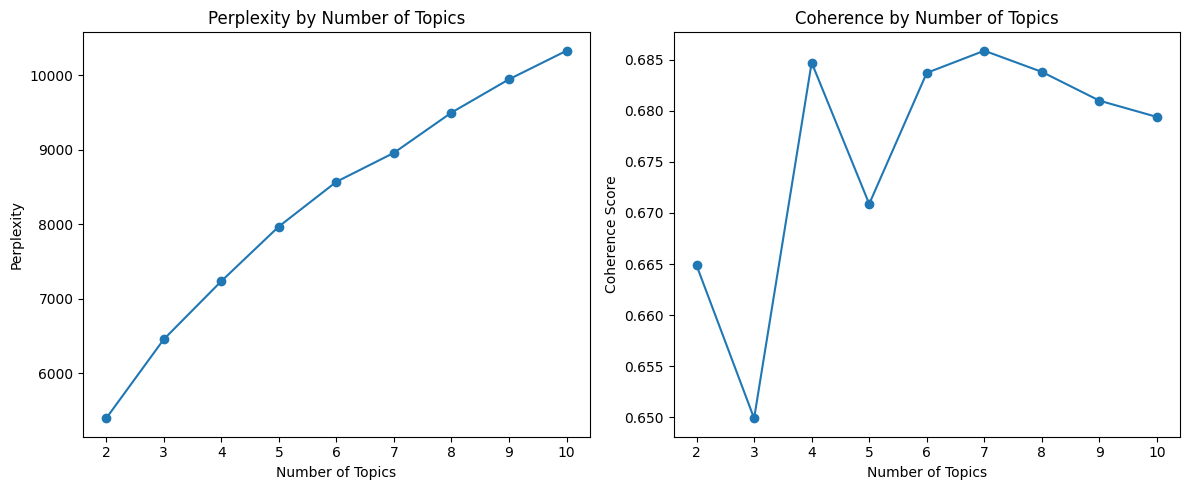

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
topic_numbers = range(2, 11)  # Adjust the range as needed
perplexities = []
coherence_scores = []

for num_topics in topic_numbers:
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(X)

    perplexity = lda_model.perplexity(X)
    perplexities.append(perplexity)

    # Scikit-learn LDA 모델을 Gensim 형식으로 변환
    corpus = Sparse2Corpus(X, documents_columns=False)
    id2word = Dictionary.from_corpus(corpus, id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))
    gensim_lda_model = gensim.models.ldamodel.LdaModel(
        corpus=corpus,
        num_topics=num_topics,
        id2word=id2word,
        passes=10,
        alpha='auto',
        eta='auto'
    )

    coherence_model = CoherenceModel(model=gensim_lda_model, texts=data_text, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# 결과 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(topic_numbers, perplexities, marker='o')
plt.title("Perplexity by Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")

plt.subplot(1, 2, 2)
plt.plot(topic_numbers, coherence_scores, marker='o')
plt.title("Coherence by Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")

plt.tight_layout()
plt.show()

In [ ]:
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(gensim_lda_model, corpus, id2word)
pyLDAvis.display(panel)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Topic1 :Adult Learning and Development in HRD
#Topic2: Adult Learning, Development, and Social Support in Lifelong Education
#Topic3 : Lifelong Learning and Knowledge Development Across the Adult Life Cycle
#Topic4: Adult Development, Learning Motivation, and Digital Literacy in Higher Education

#Topic1: Adult Learning and Development(성인교육, 트렌드, 연구리뷰, 인식Topic1 :Adult Learning and Development in HRD
#Topic2: Adult Learning, Development, and Social Support in Lifelong Education
#Topic3 : Lifelong Learning and Knowledge Development Across the Adult Life Cycle
#Topic4: Adult Development, Learning Motivation, and Digital Literacy in Higher Education

#Topic1: Adult Learning and Education(성인교육, 성인학습, 트렌드, 연구리뷰)
#Topic2: Lifelong Education(평생교육, 삶의 만족, 발달장애군, 온라인 교육)
#Topic3: Lifelong Learning in Nursing(장애, 교육만족(도), 성인전환, 만족, 발달장애성인, 잠재프로파일분석)
#Topic4: Mindset and Health Issue (마인드셋, 내러티브,  스트레스, 발달장애성인, 공격)

In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess

# Prepare your documents
# texts = [
#     ["computer", "time", "graph"],
#     ["survey", "response", "eps"],
#     ["human", "system", "computer"]
# ]

# Create a dictionary
dictionary = corpora.Dictionary(data_text)

# Create a corpus
corpus = [dictionary.doc2bow(text) for text in data_text]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=7, random_state=100)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# # Infer topics for a new document
# unseen_doc = ["computer", "time", "human"]
# bow_vector = dictionary.doc2bow(unseen_doc)
# for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
#     print(f"Score: {score}\t Topic: {lda_model.print_topic(index, 5)}")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.012*"lifelong education" + 0.009*"adult learner" + 0.007*"life cycle" + 0.004*"experiential learning" + 0.004*"adult" + 0.003*"knowledge" + 0.003*"adults with developmental disability" + 0.003*"transformative learning" + 0.002*"research trend" + 0.002*"learning experience"

Topic: 1 
Words: 0.018*"lifelong education" + 0.010*"adult learner" + 0.004*"mediating effect" + 0.004*"culture and arts education" + 0.002*"research trend" + 0.002*"developmental disability" + 0.002*"lifelong learning" + 0.002*"adults with disability" + 0.002*"lifelong education for the disabled" + 0.002*"north korean defector"

Topic: 2 
Words: 0.010*"adult learner" + 0.009*"lifelong education" + 0.005*"college student" + 0.005*"developmental disability" + 0.004*"lifelong learning" + 0.004*"qualitative research" + 0.004*"adult" + 0.004*"higher education" + 0.003*"adults with developmental disability" + 0.003*"satisfaction"

Topic: 3 
Words: 0.014*"adult learner" + 0.012*"research trend" + 0.008*

In [ ]:
df

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,유형,저자명,주저자 소속기관,논문명,학술지명,저자키워드,영어키워드,초록,abstract,발행기관명,발행연도,주제분야,반출일
0,J,박혜경,송원대학교,성인학습자의 대학생활적응 과정에 관한 연구,Oughtopia (오토피아),"성인학습자, 현역학생, 대학생활적응, 버킷리스트, 근거이론","Adult learner, Active student, College life Ad...",본 연구는 근거이론을 적용하여 성인학습자의 대학생활적응 과정을 파악하고 그 실제이론...,This study tried to identify the process of co...,인류사회재건연구원,2021,기타정치외교학,2024-09-03
1,J,한경호;조용래,한림대학교,스마트폰 중독 위험 대학생에 대한 인지적 탈융합 개입의 효능,Korean Journal of Clinical Psychology,"스마트폰 과다사용, 인지적 탈융합, 심리적 유연성 부족, 수용전념치료","smartphone overuse, cognitive defusion, psycho...",본 연구는 인지적 탈융합 개입이 스마트폰 중독 위험 대학생들의 스마트폰 과다사용 수...,The purpose of the current study was to examin...,한국임상심리학회,2021,심리과학,2024-09-03
2,J,이지은,한양사이버대학교,에듀테크로 촉발되는 고등교육의 위기와 기회,Korea Business Review,"4차 산업혁명, 에듀테크, 사례연구, 고등교육, 대학 경쟁력","4th Industrial Revolution, Edutech, Case study...","학령인구 감소와 대학의 재정 위기, 교육 서비스에 대한 불만으로 대학은 힘든 시기를...",Universities are confronting hard times ever d...,한국경영학회,2020,경영교육,2024-09-03
3,J,이희은;리상섭,코드스테이츠 커리어팀,"성인학습자의 성장마인드셋이 자기주도 학습능력에 미치는 영향: 메타인지, 그릿의 이중...",HRD연구,"성장마인드셋, 메타인지, 그릿, 자기주도 학습능력, 성인학습자","Growth mindset, Meta-cognition, GRIT, Self-dir...","본 연구는 성인학습자의 성장마인드셋과 자기주도 학습능력의 관계에서 메타인지, 그릿의...",The purpose of this study is to examine the ef...,한국인력개발학회,2023,평생교육,2024-09-03
4,J,김은경;조대연,고려대학교,토픽 모델링과 키워드 네트워크 분석을 활용한 국내 성인 대상 교육훈련 요구분석 연구...,HRD연구,"성인교육, 요구분석, 연구동향, 토픽 모델링, 키워드 네트워크 분석","topic modeling, keyword network analysis, need...",본 연구는 토픽 모델링과 키워드 네트워크 분석을 활용하여 국내 성인 대상 교육훈련 ...,The purpose of this study is to examine resear...,한국인력개발학회,2022,평생교육,2024-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,J,연혜원,서강대학교,능력주의 사회에서 공업고등학교 학생의 성인이행기 전략,경제와 사회,"Technical high school, Vocational education, E...","Technical high school, Vocational education, E...",공업고등학교 학생들은 대학 진학률이 70%를 상회하는 학력주의 사회에서 고등교육 진...,Technical high school students are a socially ...,비판사회학회,2022,사회학,2024-09-03
1562,J,최병일;심재학,매일경제 경영연구소,국내 성인 경제이해력에 영향을 미치는 요인 고찰,경제교육연구,"경제이해력, 경제태도, 경제교육 실태, 경제 교육 소외 계층","Economic attitude, Economic literacy, Economic...","본 논문은 2021년에 우리나라 성인 3,000명의 대상으로 조사한 경제이해력 조사...",This paper analyzed the factors that affect ad...,한국경제교육학회,2023,경제교육,2024-09-03
1563,J,한진수,경인교육대학교,금융 지식의 과신이 금융 행위에 미치는 영향,경제교육연구,"과신, 금융 행위, 금융 지식, 금융교육","Overconfidence, Financial behavior, Financial ...",본 연구는 본인의 금융 지식을 과신하는 사람과 그렇지 않은 사람의 금융 행위에 차이...,This study tries to test the hypothesis that o...,한국경제교육학회,2023,경제교육,2024-09-03
1564,J,한진수,경인교육대학교,누가 금융 지식을 과신하는가?,경인교육대학교 교육연구원 교육논총,"과신, 금융 지식, 금융교육, 준최적 의사결정","overconfidence, financial knowledge, financial...",과신은 개인이 최적의 금융 의사결정을 하지 못하게 만드는 요인 가운데 하나이다. 이...,Overconfidence is one of the factors that prev...,교육연구원,2023,초등교육,2024-09-03


In [ ]:
# 각 문서에 대해 토픽 분포 계산 및 DataFrame 생성
data = []
for i, text in enumerate(data_text):
    bow_vector = id2word.doc2bow(text)
    topic_scores = gensim_lda_model[bow_vector]
    for index, score in topic_scores:  # Gensim LDA 모델의 토픽 점수
        data.append([i + 1, ', '.join(text), index, score])

# Pandas DataFrame 생성
df_x = pd.DataFrame(data, columns=['Document_ID', 'Text', 'Topic', 'Score'])

# DataFrame 출력
display(df_x)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_ID,Text,Topic,Score
0,1,"artificial intelligence, qualitative research,...",0,0.926018
1,1,"artificial intelligence, qualitative research,...",1,0.024784
2,1,"artificial intelligence, qualitative research,...",2,0.026463
3,1,"artificial intelligence, qualitative research,...",3,0.022736
4,2,"reliability, validity",0,0.042726
...,...,...,...,...
6141,1537,"midlife adult learner, tourism experience, gen...",3,0.029362
6142,1538,"reading education, adult reading, adult readin...",0,0.030283
6143,1538,"reading education, adult reading, adult readin...",1,0.032025
6144,1538,"reading education, adult reading, adult readin...",2,0.034184


In [ ]:
pivoted_df = df_x.pivot_table(index='Document_ID', columns='Topic', values='Score', aggfunc='first')
pivoted_df

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic,0,1,2,3
Document_ID,,,,
1,0.926018,0.024784,0.026463,0.022736
2,0.042726,0.045158,0.048234,0.863881
3,0.016158,0.949930,0.018245,0.015667
4,0.865122,0.045187,0.048255,0.041436
5,0.019132,0.020221,0.942096,0.018550
...,...,...,...,...
1534,0.023446,0.927358,0.026464,0.022733
1535,0.019130,0.020221,0.942102,0.018547
1536,0.016164,0.017078,0.951092,0.015666


In [ ]:
# Document_ID별로 Score의 최대값을 가진 행 찾기
max_scores = df_x.loc[df_x.groupby('Document_ID')['Score'].idxmax()]
# max_scores['Topic'].value_counts()
# 결과 출력
max_scores
# max_scores.to_csv('max_scores.csv', index=False)
# df_1 = pd.merge([max_scores, pivoted_df], axis=1)
df_1 =pd.merge(left=max_scores, right=pivoted_df, on='Document_ID')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_ALE = pd.concat([df, df_1], axis=1)
df_ALE

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,저자명,주저자 소속기관,abstract,학술지명,발행기관명,주제분야,발행연도,제목,초록,저자키워드,...,Alter.,Alter_#,Document_ID,Text,Topic,Score,0,1,2,3
0,박혜경,송원대학교,This study aims to analyze the job change expe...,HRD연구,한국인력개발학회,평생교육,2021,인공지능 도입에 따른 직무 변화와 적응적 전문성 인식에 대한 고찰: 기자의 경험을 ...,최근 인공지능 기술의 발전과 도입이 직업세계에 미치는 영향에 대한 다양한 논의가 이...,"인공지능, 현상학적 질적 연구, 직무 변화, 적응적 전문성",...,,,1,"artificial intelligence, qualitative research,...",0,0.926018,0.926018,0.024784,0.026463,0.022736
1,한경호;조용래,한림대학교,Objectives: Acquired cognitive-communication d...,Communication Sciences and Disorders,한국언어청각임상학회,교육학,2020,인지-의사소통장애 간편검사(BCCD)의 신뢰도 및 타당도 연구,배경 및 목적: 고령화에 따라 후천적 인지-의사소통장애가 급증할 것으로 보인다. 이...,"후천적 인지-의사소통장애, 신뢰도, 타당도, 인지-의사소통장애 평가도구",...,,,2,"reliability, validity",3,0.863881,0.042726,0.045158,0.048234,0.863881
2,이지은,한양사이버대학교,The purpose of this study was to examine the r...,Andragogy Today: Interdisciplinary Journal of ...,한국성인교육학회,분야교육,2023,교육서비스산업 종사자가 지각하는 조직지원인식과 조직시민행동 간의 관계에서 직무열의의...,"본 연구는 교육서비스산업 종사자인 학원강사가 지각하는 조직지원인식, 조직시민행동, ...","조직지원인식, 조직시민행동, 직무열의, 매개효과, 학원강사",...,,,3,"perceived organizational support, organization...",1,0.949930,0.016158,0.949930,0.018245,0.015667
3,이희은;리상섭,코드스테이츠 커리어팀,The Masterity Scale is a self-report scale wit...,Andragogy Today: Interdisciplinary Journal of ...,한국성인교육학회,분야교육,2023,Rasch 평정척도모형을 활용한 장인성 측정 도구의 단축형 개발 및 타당화 연구,"장인성 측정 도구는 현대 장인의 특성을 4가지의 측면으로 구분하여 개발되었으며, 장...","장인성, 단축형 척도, Rasch 평정척도모형",...,,,4,"masterity, rasch rating scale mode",0,0.865122,0.865122,0.045187,0.048255,0.041436
4,김은경;조대연,고려대학교,The purpose of this research was to identify a...,Andragogy Today: Interdisciplinary Journal of ...,한국성인교육학회,분야교육,2023,"대학 행정관리자의 온정적 합리주의 리더십과 행정직원의 학습문화 수준, 자기효능감, ...",본 연구의 목적은 대학 행정관리자의 온정적 합리주의 리더십과 행정직원의 학습문화 수...,"대학행정, 온정적 합리주의 리더십, 조직효과성, 학습문화 수준, 자기효능감, 팔로워십",...,,,5,"university administration, compassionate ratio...",2,0.942096,0.019132,0.020221,0.942096,0.018550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,연혜원,서강대학교,"‘Koindol’, a classical humanities academy supe...",교양교육과 시민,교양교육연구소,교양기초교육,2022,평생교육으로서의 인문학 교육에 관한 고찰 －서울시 교육청 고전·인문아카데미 ‘고인돌...,서울특별시 교육청이 주관하고 서울경제신문의 백상경제연구원이 기획과 실행을 맡은 고전...,"생애주기별 교육, 평생교육, 인문학 교육, 교양교육, ‘고인돌’, ‘고전인문학이돌아...",...,,,1534,"education by life cycle, lifelong education, h...",1,0.927358,0.023446,0.927358,0.026464,0.022733
1534,최병일;심재학,매일경제 경영연구소,This study analyzed the mathematical literacy ...,교과교육학연구,교과교육연구소,교과교육학,2023,문해 교육과정에 나타나는 성인의 수학 소양 분석,본 연구는 성인에게 필요한 수학 소양을 함양하기 위한 교육이 어떻게 이루어지고 있는...,"성인 수학, 수학 교육, 수리문해, 수학 소양, 평생교육, 문해 교육과정",...,,,1535,"mathematics for adult, mathematics education, ...",2,0.942102,0.019130,0.020221,0.942102,0.018547
1535,한진수,경인교육대학교,This study aims to identify the components of ...,관광연구,대한관광경영학회,관광학일반,2021,항공사 객실승무원의 직업적 특성을 반영한 사회적 유능성의 구성요인에 대한 연구,본 연구의 목적은 항공사 객실승무원의 직업적 특성을 반영한 사회적 유능성의 구성요인...,"사회적 유능성, 직업적 특성, 항공사 객실승무원, 업무수행능력, 환경에 대한 적응능...",...,,,1536,"social competence, occupational characteristic...",2,0.951092,0.016164,0.017078,0.951092,0.015666
1536,한진수,경인교육대학교,This study attempted to confirm the effect of ...,관광레저연구,(사)한국관광레저학회,관광학,2021,관광경험이 생성감과 자아레질리언스에 미치는 영향: 중년의 대학 성인학습자를 중심으로,This study attempted to confirm the effect of ...,"중년성인학습자, 관광경험, 생성감, 자아레질리언스",...,,,1537,"midlife adult learner, tourism experience, gen...",2,0.908341,0.030289,0.032008,0.908341,0.029362


In [ ]:
df_ALE.to_csv('Topic_scores.csv', index=False)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import numpy as np
import matplotlib.pyplot as plt
import gensim
from gensim.matutils import Sparse2Corpus
from gensim.corpora import Dictionary
import re

# '영어키워드' 열 사용
data_text = df['영어키워드']

# 영어 키워드만 포함된 경우만 필터링 (한글 및 기타 언어 제거)
df = df[df['영어키워드'].apply(lambda x: bool(re.search(r'[a-zA-Z]', x)))]

# 복수형을 단수형으로 변환하는 함수
def singularize(keyword):
    if keyword.endswith('ies'):
        return keyword[:-3] + 'y'
    elif keyword.endswith('es'):
        return keyword[:-2]
    elif keyword.endswith('s'):
        return keyword[:-1]
    else:
        return keyword

# 텍스트 전처리: 소문자 변환, 불필요한 공백 제거 및 영어 단어만 남기기
def preprocess_text(text):
    keywords = text.split(',')
    # 영어 알파벳만 포함된 단어만 필터링하고 복수형을 단수형으로 변환
    keywords = [singularize(keyword.strip().lower()) for keyword in keywords if re.match(r'^[a-zA-Z\s]+$', keyword.strip())]
    return keywords

data_text = data_text.apply(preprocess_text)

# CountVectorizer를 사용하여 문서-단어 행렬 생성
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
X = vectorizer.fit_transform(data_text)

# LDA 모델 학습
num_topics = 7  # 원하는 토픽의 수로 조정
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# 단어 집합
feature_names = vectorizer.get_feature_names_out()
# 각 토픽에 기여하는 단어와 그 가중치 계산 (정규화 추가)
def get_normalized_topic_keywords(model, feature_names, n_top_words=5):
    topics_keywords = []
    for topic_idx, topic in enumerate(model.components_):
        normalized_topic = topic / topic.sum()  # 각 토픽의 가중치를 확률로 변환
        sorted_indices = normalized_topic.argsort()[:-n_top_words - 1:-1]
        keywords = [(feature_names[i], normalized_topic[i]) for i in sorted_indices]
        topics_keywords.append(keywords)
    return topics_keywords

# 주요 키워드와 가중치 출력
topics_keywords = get_normalized_topic_keywords(lda_model, feature_names, n_top_words=5)

# 각 문서에 대한 토픽 확률 분포 계산
doc_topic_distr = lda_model.transform(X)

# 전체 문서에서 각 토픽이 차지하는 비율 계산
topic_distribution = np.mean(doc_topic_distr, axis=0)

# 주요 키워드와 가중치를 데이터프레임으로 저장
df_topics = pd.DataFrame({
    f"Topic {idx+1} ({topic_distribution[idx]*100:.1f}%)": [f"{keyword} ({weight:.4f})" for keyword, weight in topic]
    for idx, topic in enumerate(topics_keywords)
})

# 결과 출력
print(df_topics)

# 각 토픽의 비율 출력
for i, proportion in enumerate(topic_distribution):
    print(f"Topic {i+1} 비율: {proportion:.4f}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


                Topic 1 (17.1%)              Topic 2 (11.4%)  \
0        adult learner (0.0384)  lifelong education (0.0112)   
1    lifelong learning (0.0099)   lifelong learning (0.0076)   
2  learning experience (0.0083)    flipped learning (0.0066)   
3   lifelong education (0.0071)    machine learning (0.0066)   
4       adult learning (0.0060)     adult education (0.0034)   

                  Topic 3 (11.7%)                 Topic 4 (13.2%)  \
0         research trend (0.0064)     lifelong education (0.0185)   
1      critical thinking (0.0064)          adult learner (0.0086)   
2        nursing student (0.0048)  experiential learning (0.0072)   
3  adult college student (0.0048)        quality of life (0.0058)   
4     workplace learning (0.0048)         adult learning (0.0058)   

                   Topic 5 (16.5%)                    Topic 6 (12.1%)  \
0           adult learner (0.0542)             adult learner (0.0236)   
1  latent profile analysi (0.0084)        lifelong edu

In [ ]:
# HTML 저장
pyLDAvis.save_html(panel, 'lda_visualization.html')


from google.colab import files
files.download('lda_visualization.html')


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**최적 토픽수 계산**

In [ ]:
#최적 토픽수 계산

!pip install --upgrade gspread oauth2client
!pip install pyLDAvis scikit-learn pandas

import gspread
from google.auth import default
from google.colab import auth
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import CoherenceModel
import gensim
from gensim.corpora import Dictionary
from gensim.matutils import Sparse2Corpus
import numpy as np

# 사용자 인증 수행
auth.authenticate_user()
creds, _ = default()

# Google Sheets API에 접근
gc = gspread.authorize(creds)

# 구글 시트 열기
sheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1_POSYy0Xtn0du2FZcJQRAISXxqdMghhTc94yWUCpv3E/edit?gid=1852009435#gid=1852009435')
worksheet = sheet.get_worksheet(0)

# 데이터프레임으로 변환
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# 컬럼 이름들 확인
print(df.columns)

# 컬럼별로 분석하기 위한 코드
def calculate_metrics(column_name, df):
    # 텍스트 전처리
    df[column_name] = df[column_name].astype(str)
    df = df[df[column_name].apply(lambda x: isinstance(x, str) and x.strip() != '')]
    data_text = df[column_name].apply(lambda x: [keyword.strip().lower() for keyword in x.split(',') if keyword.strip()])

    # CountVectorizer를 사용하여 문서-단어 행렬 생성
    vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
    X = vectorizer.fit_transform(data_text)

    # 퍼플렉시티와 응집도를 계산하기 위한 값 초기화
    topic_numbers = [2, 3, 4, 5, 6, 7,8]
    perplexities = []
    coherence_scores = []

    for num_topics in topic_numbers:
        lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
        lda_model.fit(X)

        perplexity = lda_model.perplexity(X)
        perplexities.append(perplexity)

        # Scikit-learn LDA 모델을 Gensim 형식으로 변환
        corpus = Sparse2Corpus(X, documents_columns=False)
        id2word = Dictionary.from_corpus(corpus, id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))
        gensim_lda_model = gensim.models.ldamodel.LdaModel(
            corpus=corpus,
            num_topics=num_topics,
            id2word=id2word,
            passes=10,
            alpha='auto',
            eta='auto'
        )

        coherence_model = CoherenceModel(model=gensim_lda_model, texts=data_text, dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)

    return topic_numbers, perplexities, coherence_scores

# 저자키워드, 영어초록, 영어키워드에 대해 반복해서 계산
columns = ['영어키워드']
for column in columns:
    print(f'--- {column} ---')
    topic_numbers, perplexities, coherence_scores = calculate_metrics(column, df)

    # 결과 출력
    print("토픽 수:", topic_numbers)
    print("퍼플렉시티:", perplexities)
    print("응집도 점수:", coherence_scores)
    print()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['유형', '저자명', '주저자 소속기관', '논문명', '학술지명', '저자키워드', '영어키워드', '영어초록',
       '발행기관명', '발행연도', '주제분야'],
      dtype='object')
--- 영어키워드 ---


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽 수: [2, 3, 4, 5, 6, 7, 8]
퍼플렉시티: [3894.5839312407943, 4567.439442593986, 5063.9841268354185, 5495.661815564702, 5803.519886394556, 6228.672108941247, 6456.960890243777]
응집도 점수: [0.6490997908545708, 0.6682757892226249, 0.6603471938811991, 0.6491326979409369, 0.6723170338500202, 0.6824851307689921, 0.6811081352559513]



In [ ]:
try:
    import pycaret
except:
    !pip install pycaret==2.2.2

try:
    import explainerdashboard
except:
    !pip install explainerdashboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of scikit-learn to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of scikit-learn to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of pyldavis to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates

In [ ]:
 !pip install pycaret==2.2.2

  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!python -m spacy download en_core_web_sm
!python -m textblob.download_corpora

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 111.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_r

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [ ]:
# colors = ['gold', 'mediumturquoise']
# labels = ['REAL','FAKE']
values = df['Topic'].value_counts()/df['Topic'].shape[0]

fig = go.Figure(data=[go.Pie(values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Target Balance",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)

fig.show()

In [ ]:
from pycaret.nlp import *
%time
fake_news_nlp = setup(data = df, target = '영어키워드', session_id = 123)

ModuleNotFoundError: No module named 'pycaret.nlp'

In [ ]:
from pycaret.nlp import *

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
!pip install --upgrade --ignore-installed pip setuptools


  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
Using cached setuptools-75.8.0-py3-none-any.whl (1.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
# 다시 시작 후 이거 실행
!pip install -U pycaret==2.3.10 --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 135.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
# !conda install -c conda-forge pycaret==2.3.10 scikit-learn==0.23.2 gensim<4.0 nltk pandas<1.4 numpy<1.24 scipy<1.9
!pip install pycaret==2.3.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 11.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
